In [291]:
import os
# Set working directory
os.chdir(r"C:\Users\carpa\Documents\GitHub\week11_mini_project_ML")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
diabetes = pd.read_csv("diabetes_prediction_dataset.csv")

In [263]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [264]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [265]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [266]:
diabetes['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [267]:
#Drop rows with missing smoking history.
diabetes['smoking_history'] = diabetes['smoking_history'].replace("No Info", np.nan)

In [268]:
diabetes = diabetes.dropna(subset=['smoking_history'])

In [269]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [270]:
duplicates = diabetes.duplicated()
print(duplicates.sum()) 

925


In [271]:
diabetes = diabetes.drop_duplicates()

In [272]:
diabetes 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [273]:
#One-hot Encoding
diabetes = pd.get_dummies(diabetes, columns=["smoking_history"], drop_first=True, dtype=int)

In [274]:
diabetes=pd.get_dummies(diabetes, columns=["gender"], drop_first=True, dtype=int)

In [275]:
diabetes.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
smoking_history_ever             int64
smoking_history_former           int64
smoking_history_never            int64
smoking_history_not current      int64
gender_Male                      int64
gender_Other                     int64
dtype: object

In [276]:
X=diabetes.drop("diabetes", axis=1)

In [277]:
y=diabetes["diabetes"].astype(str)

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [280]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [281]:
dt=DecisionTreeClassifier(max_depth=5)

In [282]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [283]:
import matplotlib.pyplot as plt

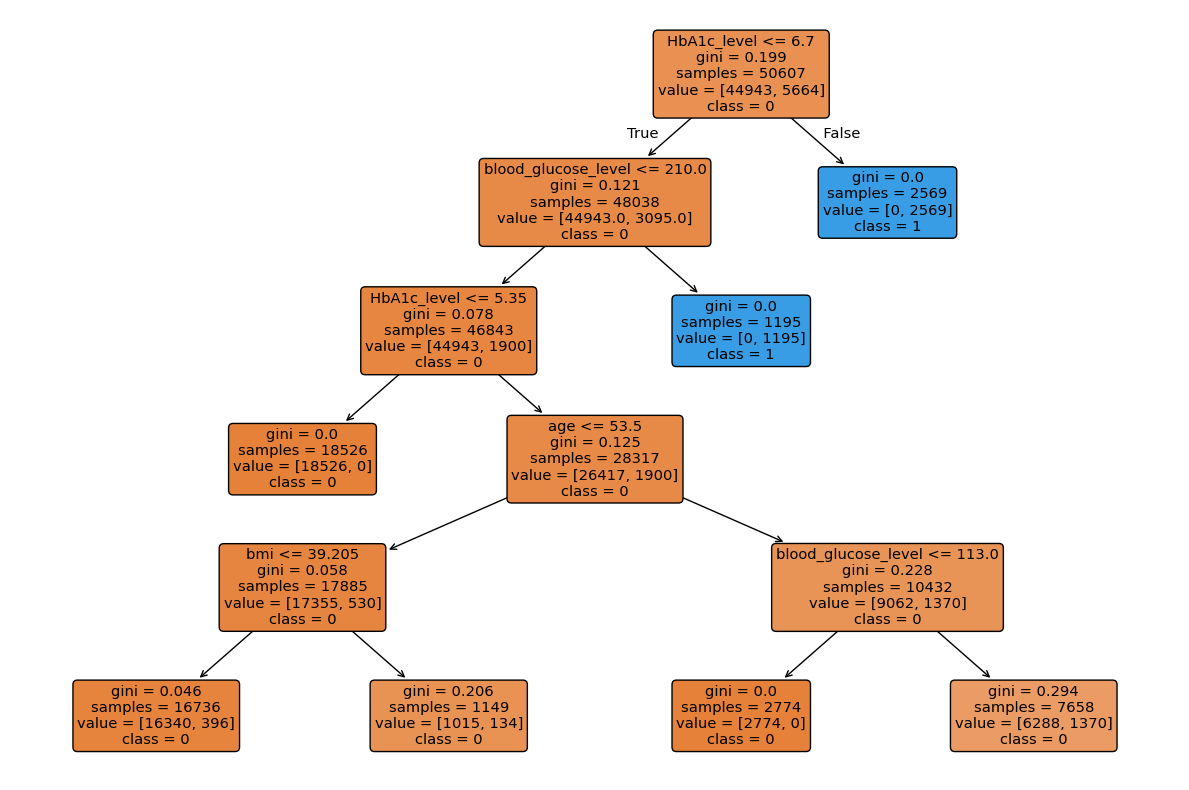

In [284]:
plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names = X_train.columns,
    class_names = y_train.unique(),
    filled=True,
    rounded=True,
    impurity=True,
)
plt.tight_layout()
plt.show()

In [285]:
dt.score(X_test,y_test)

0.964116345241859

96.4% accuracy, the model correctly predicted 96.4% of the test samples.

In [286]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [288]:
y_pred = dt.predict(X_test) #The model uses the rules it learned (the splits in the decision tree) to predict the class label for each row in X_test

In [289]:
accuracy_score(y_test, y_pred)

0.964116345241859

In [ ]:
#96.4% of the predictions were correct.

In [293]:
cm=confusion_matrix(y_test, y_pred)

In [295]:
cm

array([[11279,     0],
       [  454,   919]])

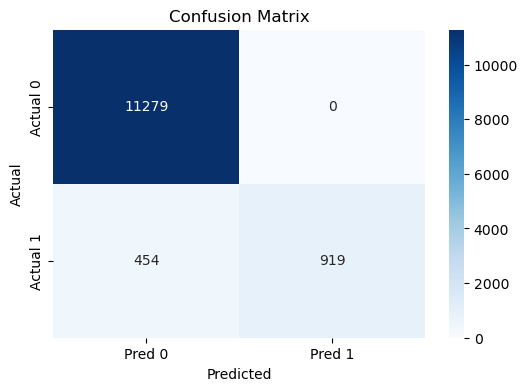

In [294]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The model predicts the majority class 0 well.
It never predicted false positive. (never predicted 1 when true label was 0)
Some false negatives (FN=454). It missed some of the positive cases(class1)
True positives=919, model correctly predicted class 1.

**KNN** 

In [303]:
from sklearn.neighbors import KNeighborsClassifier

In [304]:
from sklearn.preprocessing import MinMaxScaler

In [305]:
scaler= MinMaxScaler()

In [306]:
scaler.fit(X_train)

MinMaxScaler()

In [307]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [308]:
knn=KNeighborsClassifier(n_neighbors=3)

In [309]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [310]:
y_pred = knn.predict(X_test_scaled)

In [312]:
accuracy_score(y_test, y_pred) #proportion of correct predictions. Number of correct predictions/Total number of predictions.

0.9514701233006639

In [313]:
knn.score(X_test_scaled,y_test)

0.9514701233006639

In [315]:
confusion_matrix(y_test, y_pred)

array([[11161,   118],
       [  496,   877]])

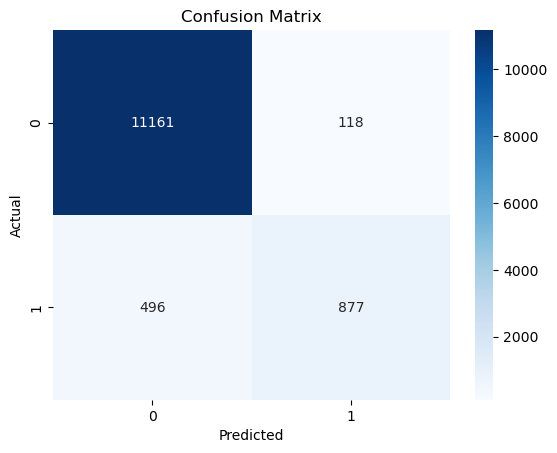

In [316]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [317]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

In [318]:
print(results.head(10))

      Actual Predicted
65936      0         0
65302      0         0
8205       0         0
52860      1         1
1380       0         0
21710      0         0
38127      0         0
6412       0         0
87113      1         0
436        0         0
